In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [3]:
df = pd.read_csv("aerofit_treadmill_data.csv")

In [4]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
df.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [6]:
df.isna().any().sum()


0

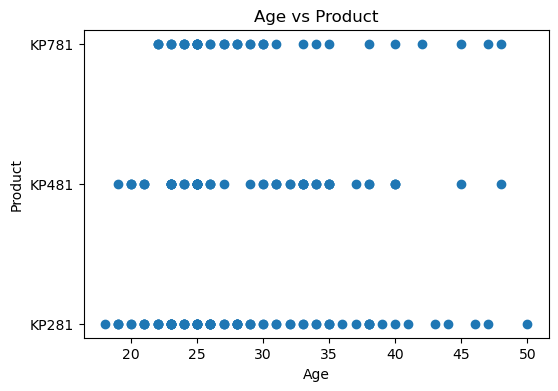

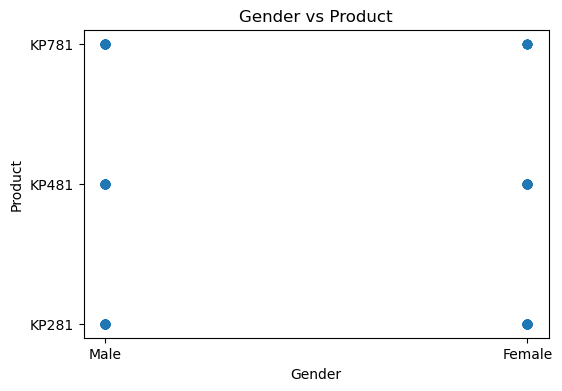

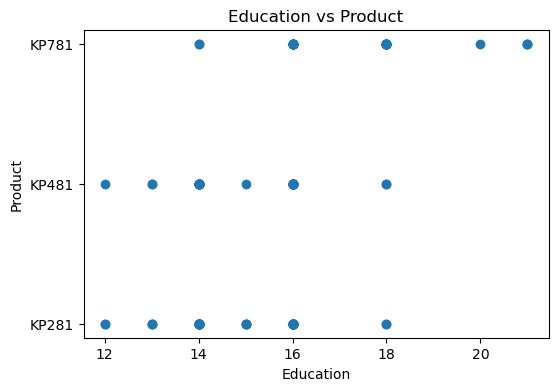

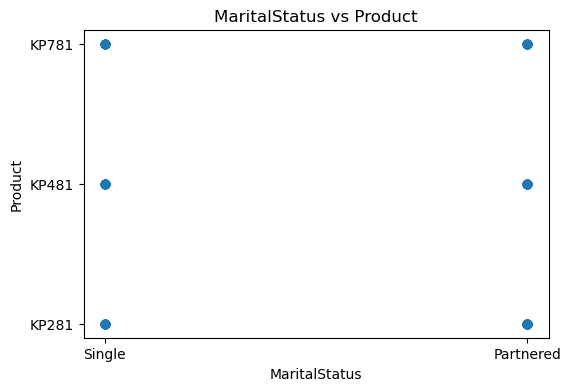

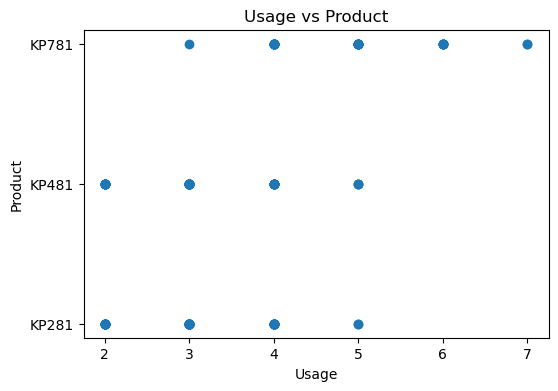

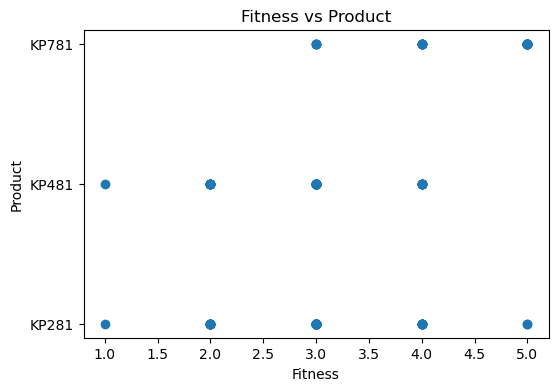

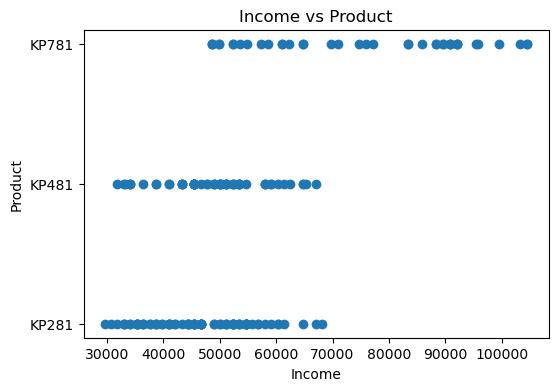

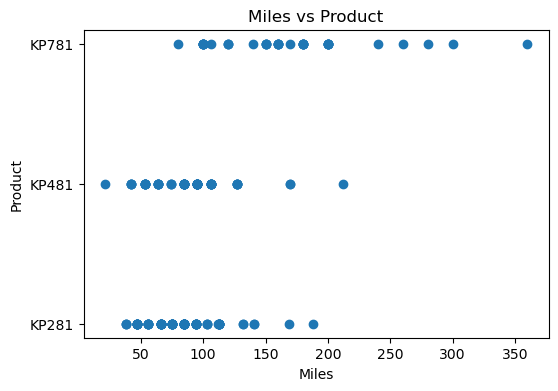

In [10]:
X = df.drop('Product', axis=1)  # Excluding 'Product' column
y = df['Product']

for column in X.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(X[column], y)
    plt.xlabel(column)
    plt.ylabel('Product')
    plt.title(f'{column} vs Product')
    plt.show()

In [8]:
df.skew()

C:\Users\91938\AppData\Local\Temp\ipykernel_24756\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Age          0.982161
Education    0.622294
Usage        0.739494
Fitness      0.454800
Income       1.291785
Miles        1.724497
dtype: float64

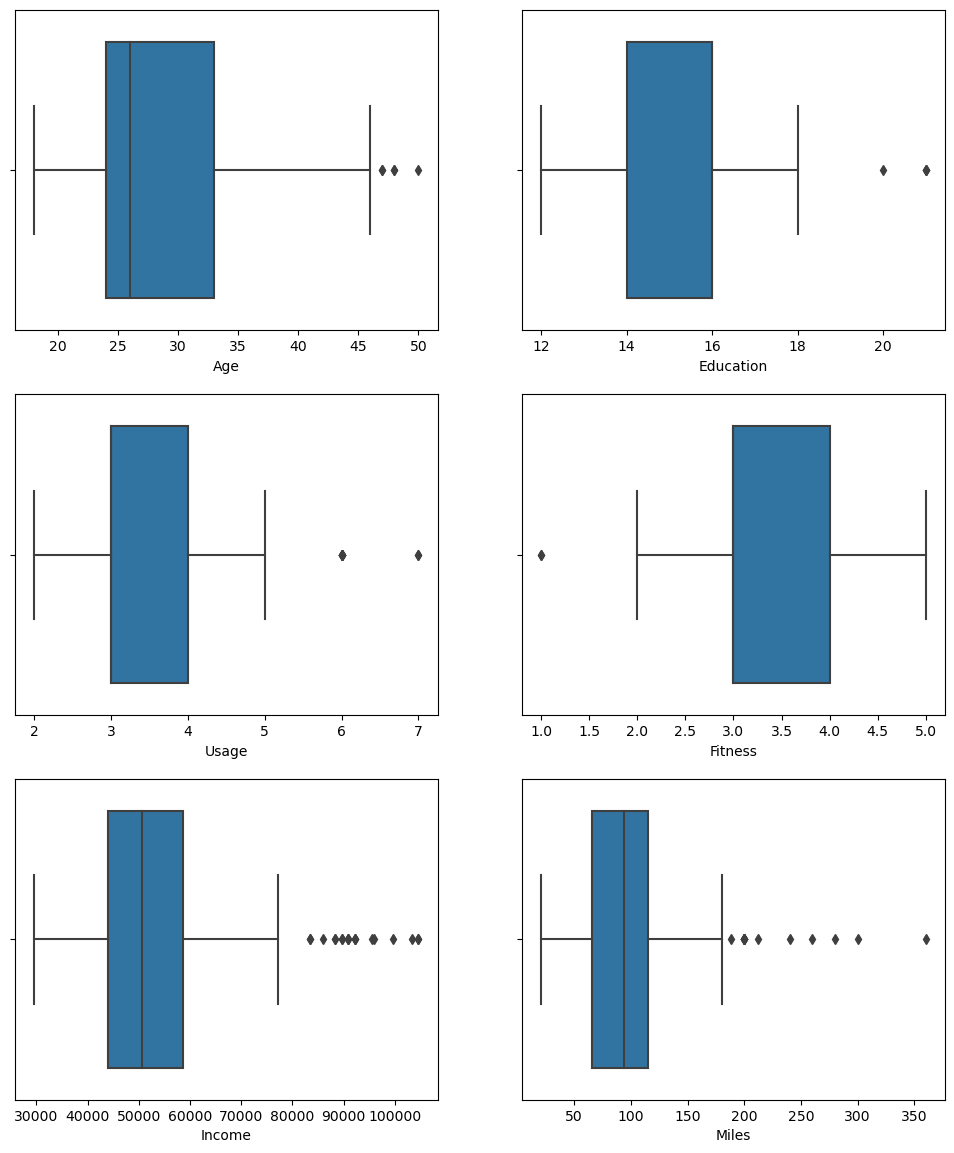

In [14]:

fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)
aerofit_df = df
sns.boxplot(data=aerofit_df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=aerofit_df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=aerofit_df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=aerofit_df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=aerofit_df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=aerofit_df, x="Miles", orient='h', ax=axis[2,1])
plt.show()

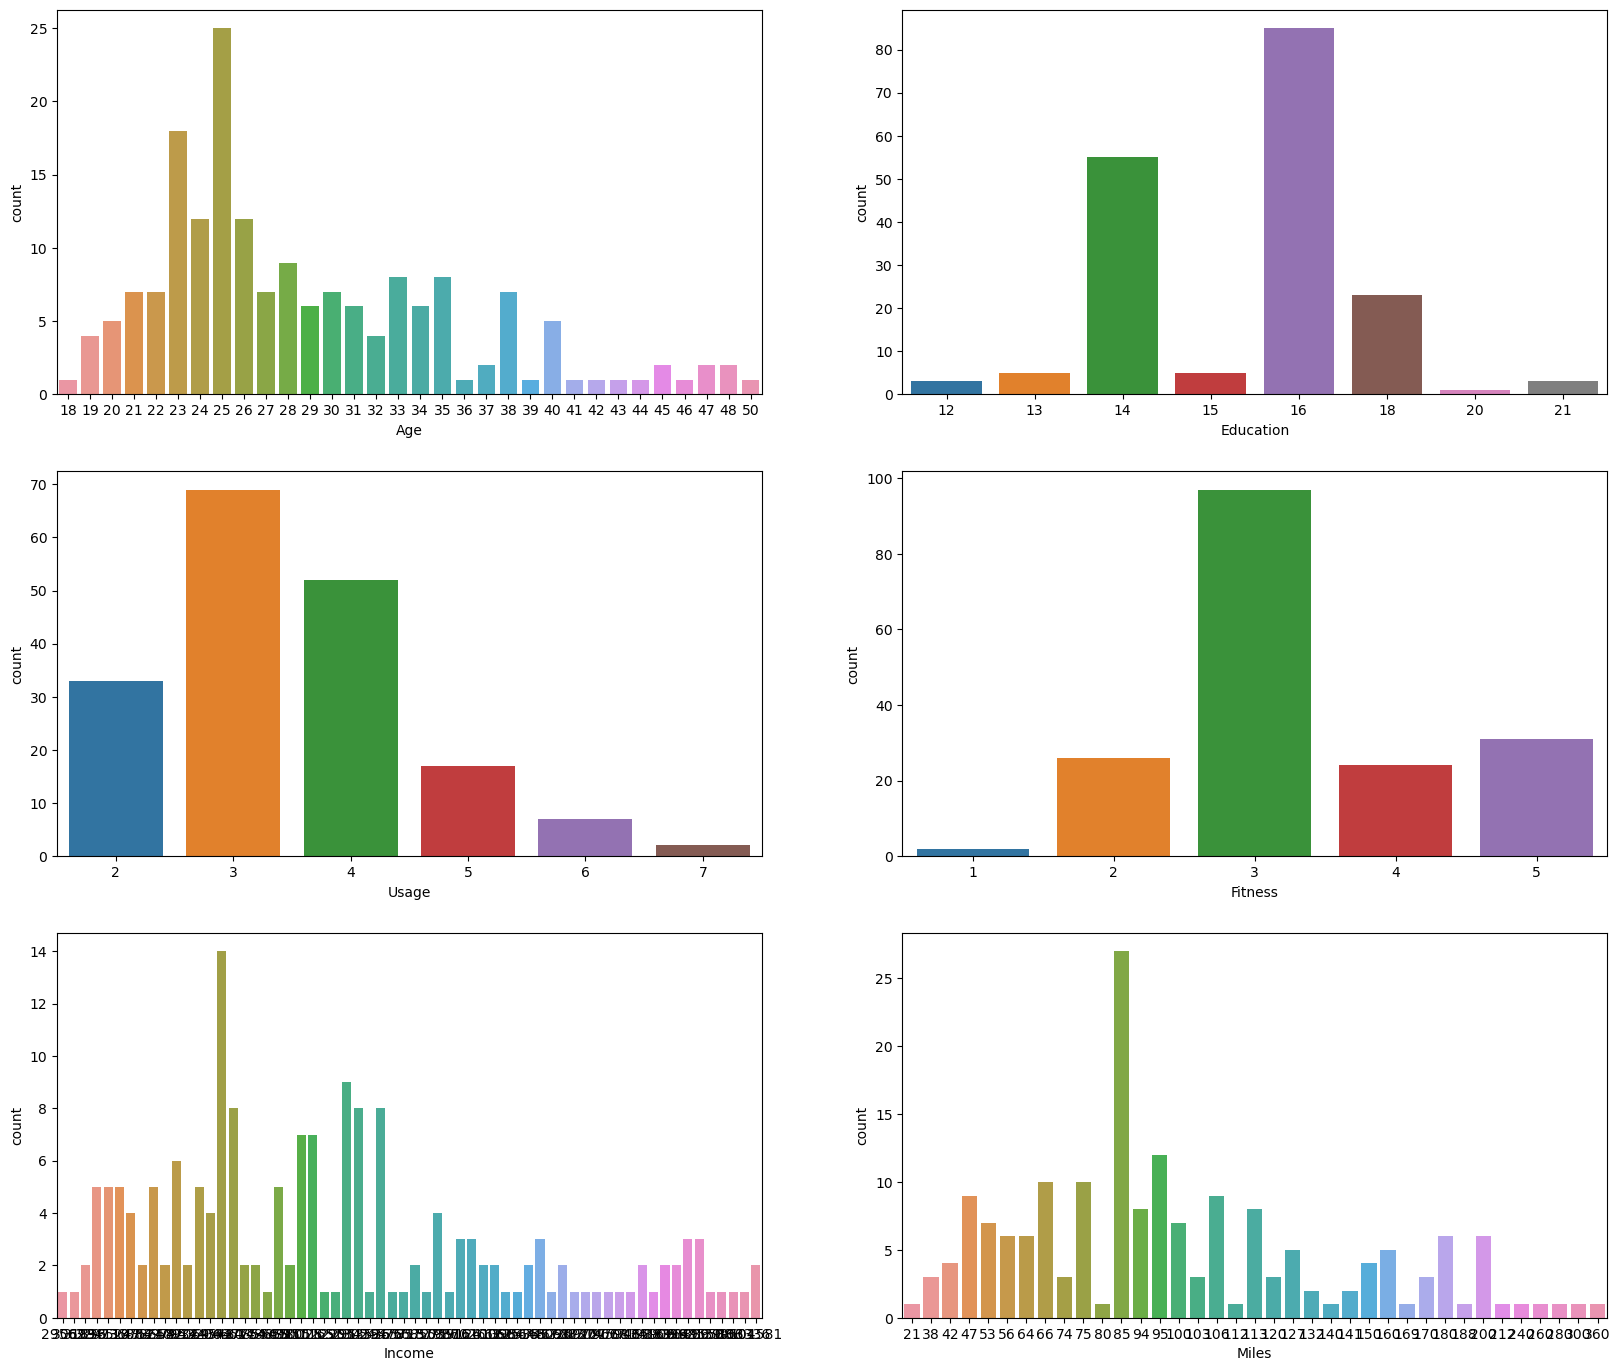

In [16]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))
fig.subplots_adjust(top=1.2)

sns.countplot(data=aerofit_df, x="Age", ax=axis[0,0])
sns.countplot(data=aerofit_df, x="Education", ax=axis[0,1])
sns.countplot(data=aerofit_df, x="Usage", ax=axis[1,0])
sns.countplot(data=aerofit_df, x="Fitness", ax=axis[1,1])
sns.countplot(data=aerofit_df, x="Income", ax=axis[2,0])
sns.countplot(data=aerofit_df, x="Miles", ax=axis[2,1])
plt.show()

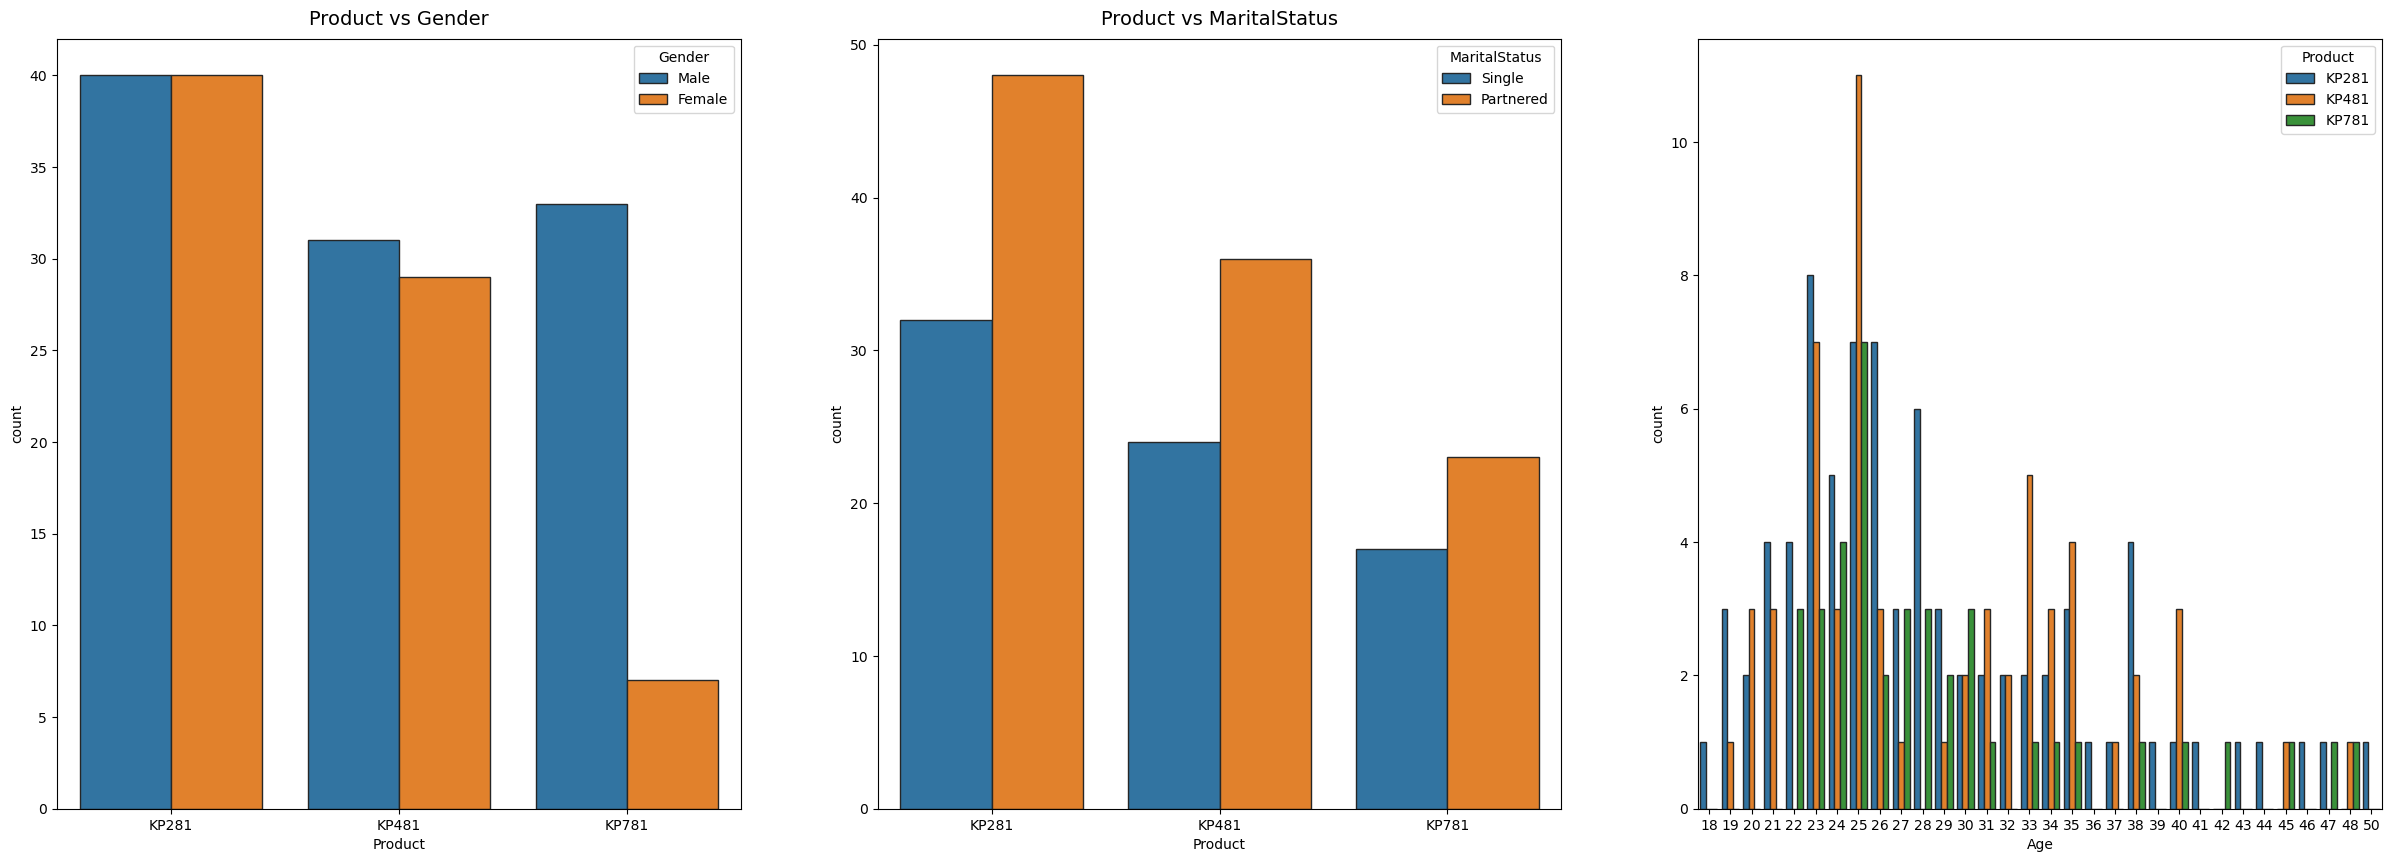

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
sns.countplot(data=aerofit_df, x='Product', hue='Gender', edgecolor="0.15", ax=axs[0])
sns.countplot(data=aerofit_df, x='Product', hue='MaritalStatus', edgecolor="0.15", ax=axs[1])
sns.countplot(data=aerofit_df, x='Age', hue='Product', edgecolor="0.15", ax=axs[2])
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
plt.show()

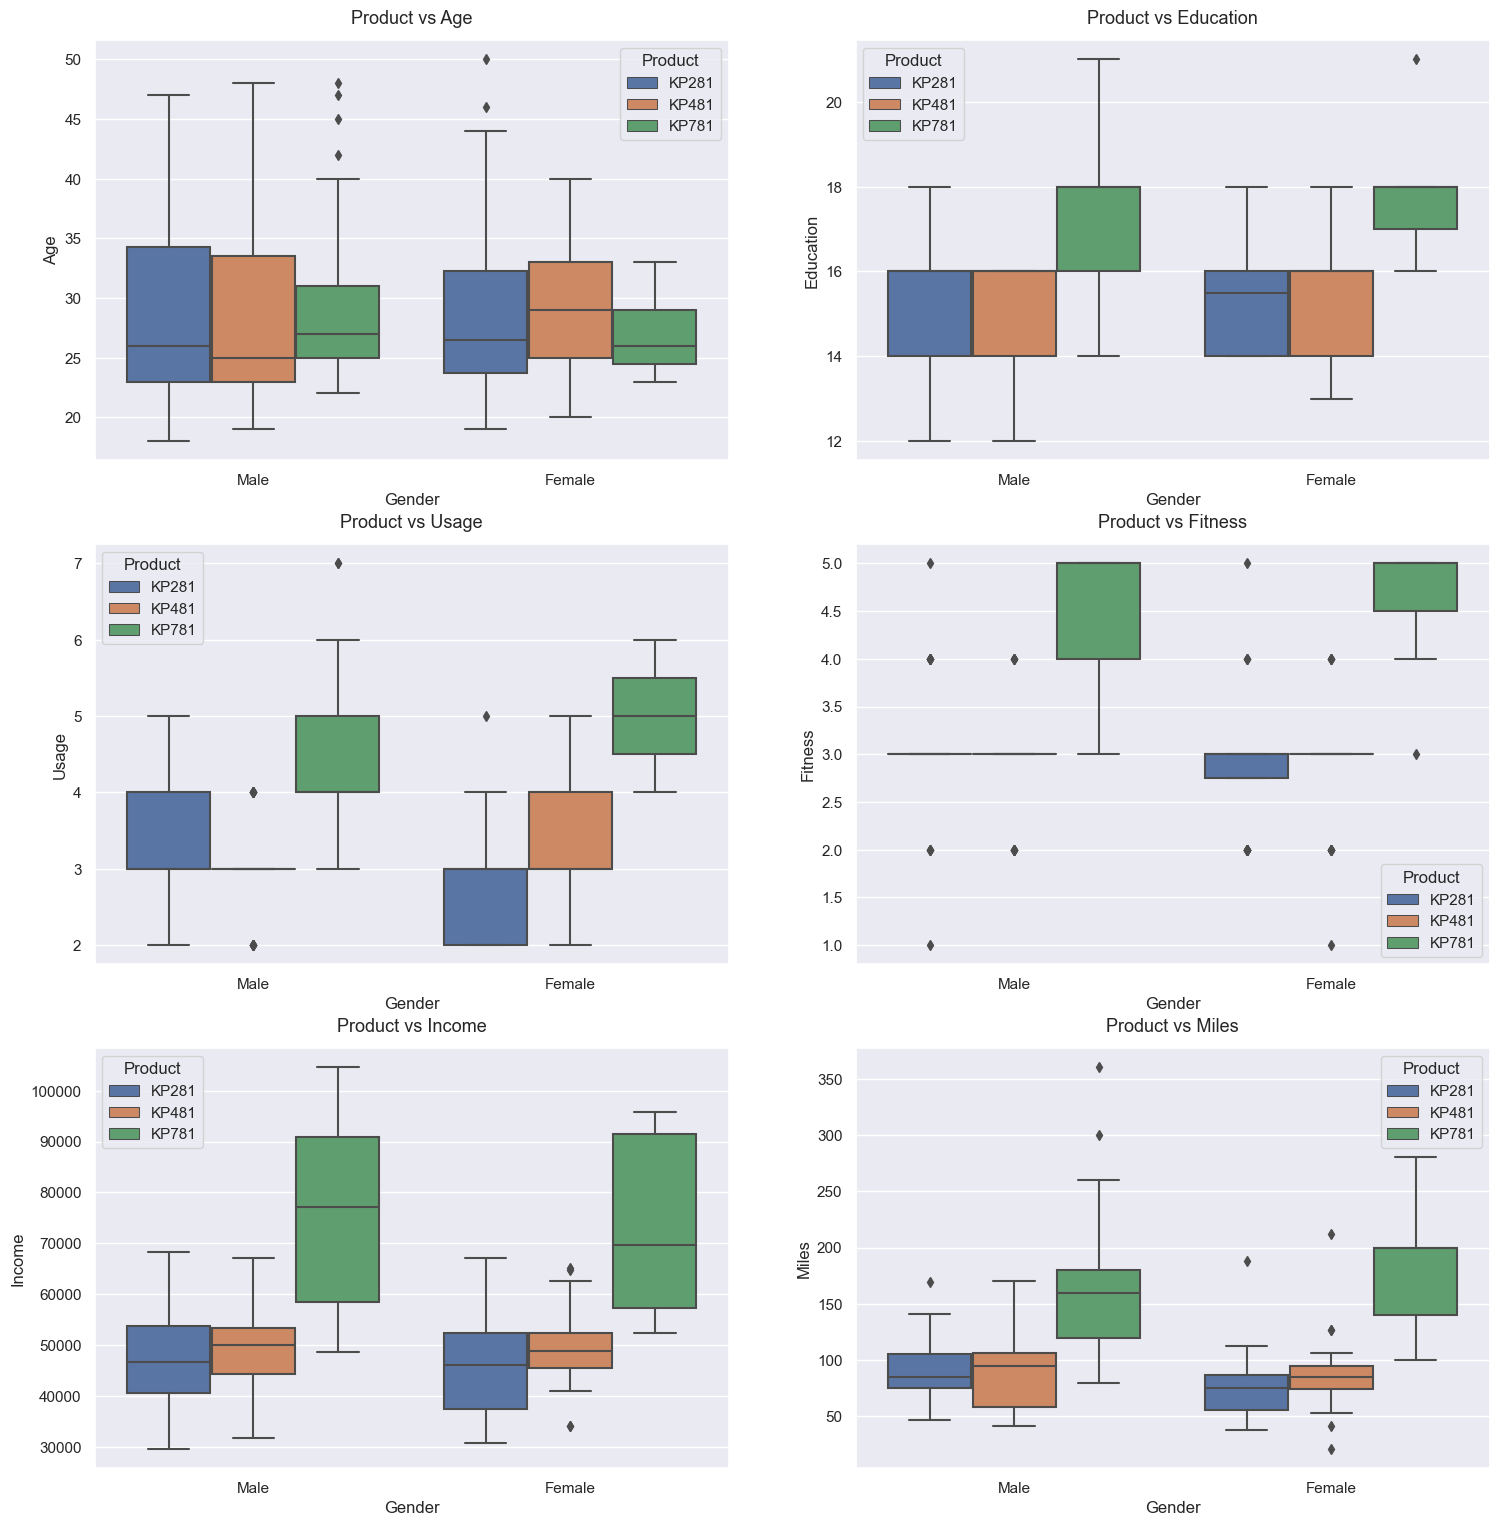

In [18]:
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set(color_codes = True)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
fig.subplots_adjust(top=1.3)
count = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=aerofit_df, x='Gender', y=attributes[count], hue='Product', ax=axs[i,j])
        axs[i,j].set_title(f"Product vs {attributes[count]}", pad=12, fontsize=13)
        count += 1

In [20]:
df.corr()

C:\Users\91938\AppData\Local\Temp\ipykernel_24756\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


C:\Users\91938\AppData\Local\Temp\ipykernel_24756\3307247003.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(aerofit_df.corr(), ax=ax, annot = True, linewidths = 0.05, fmt ='0.2f')


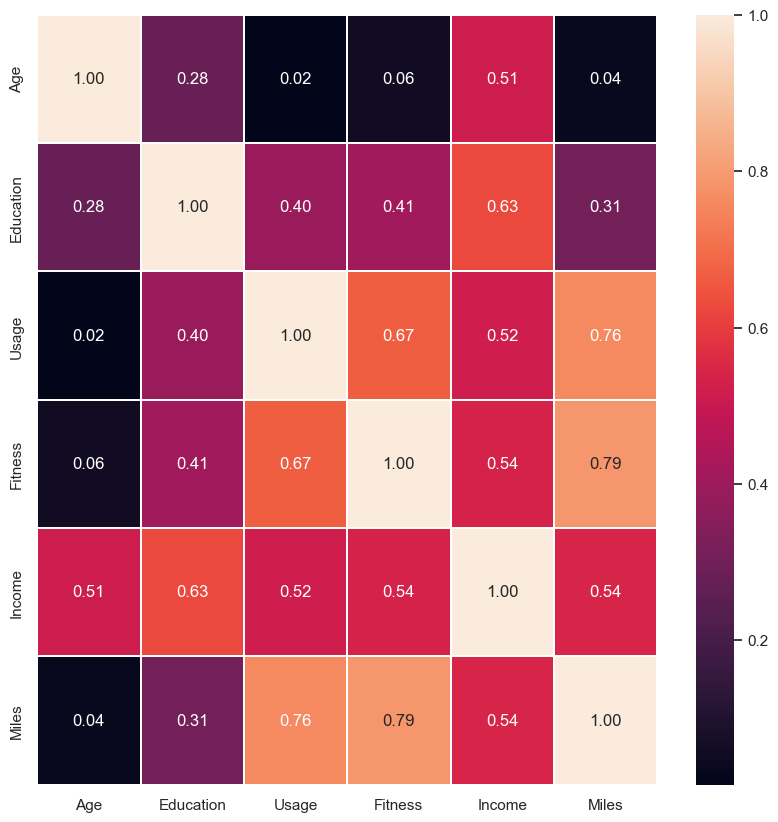

In [22]:
fig, ax = plt.subplots(figsize = (10,10))
sns.set(color_codes = True)
sns.heatmap(aerofit_df.corr(), ax=ax, annot = True, linewidths = 0.05, fmt ='0.2f')
plt.show()

In [24]:
#What percent of customers have purchased KP281, KP481, or KP781?

aerofit_df1 = aerofit_df[['Product', 'Gender', 'MaritalStatus']].melt()
(aerofit_df1.groupby(['variable', 'value'])[['value']].count() / len(aerofit_df)).mul(100).round(3).astype(str) + '%'
#.melt(): Reshapes the selected columns into a long format using the melt() function. It transforms the DataFrame by unpivoting
#it, converting columns into rows, and combining them into two columns: 'variable' (containing column names) and 'value' 
#(containing corresponding values).


value
variable      value             
Gender        Female     42.222%
              Male       57.778%
MaritalStatus Partnered  59.444%
              Single     40.556%
Product       KP281      44.444%
              KP481      33.333%
              KP781      22.222%

In [27]:
#What is the probability of a customer based on Gender ( Male or Female ) buying a certain treadmill Product?

def p_prod_given_gender(gender, print_marginal=False):
    if gender is not "Female" and gender is not "Male":
        return "Invalid gender value."
    
    aerofit_df1 = pd.crosstab(index=aerofit_df['Gender'], columns=[aerofit_df['Product']])
    p_281 = aerofit_df1['KP281'][gender] / aerofit_df1.loc[gender].sum()
    p_481 = aerofit_df1['KP481'][gender] / aerofit_df1.loc[gender].sum()
    p_781 = aerofit_df1['KP781'][gender] / aerofit_df1.loc[gender].sum()
    
    if print_marginal:
        print(f"P(Male): {aerofit_df1.loc['Male'].sum()/len(aerofit_df):.2f}")
        print(f"P(Female): {aerofit_df1.loc['Female'].sum()/len(aerofit_df):.2f}\n")
    
    print(f"P(KP281/{gender}): {p_281:.2f}") 
    print(f"P(KP481/{gender}): {p_481:.2f}")
    print(f"P(KP781/{gender}): {p_781:.2f}\n")
    
p_prod_given_gender('Male', True)
p_prod_given_gender('Female')

P(Male): 0.58
P(Female): 0.42

P(KP281/Male): 0.38
P(KP481/Male): 0.30
P(KP781/Male): 0.32

P(KP281/Female): 0.53
P(KP481/Female): 0.38
P(KP781/Female): 0.09



<>:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\91938\AppData\Local\Temp\ipykernel_24756\1052015630.py:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if gender is not "Female" and gender is not "Male":
C:\Users\91938\AppData\Local\Temp\ipykernel_24756\1052015630.py:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if gender is not "Female" and gender is not "Male":


In [28]:
#What is the probability of a customer based on MaritalStatus ( Single or Partnered ) buying a certain treadmill Product?

def p_prod_given_mstatus(status, print_marginal=False):
    if status is not "Single" and status is not "Partnered":
        return "Invalid marital status value."
    
    aerofit_df1 = pd.crosstab(index=aerofit_df['MaritalStatus'], columns=[aerofit_df['Product']])
    p_281 = aerofit_df1['KP281'][status] / aerofit_df1.loc[status].sum()
    p_481 = aerofit_df1['KP481'][status] / aerofit_df1.loc[status].sum()
    p_781 = aerofit_df1['KP781'][status] / aerofit_df1.loc[status].sum()
    
    if print_marginal:
        print(f"P(Single): {aerofit_df1.loc['Single'].sum()/len(aerofit_df):.2f}")
        print(f"P(Partnered): {aerofit_df1.loc['Partnered'].sum()/len(aerofit_df):.2f}\n")
    
    print(f"P(KP281/{status}): {p_281:.2f}") 
    print(f"P(KP481/{status}): {p_481:.2f}")
    print(f"P(KP781/{status}): {p_781:.2f}\n")
    
p_prod_given_mstatus('Single', True)
p_prod_given_mstatus('Partnered')


P(Single): 0.41
P(Partnered): 0.59

P(KP281/Single): 0.44
P(KP481/Single): 0.33
P(KP781/Single): 0.23

P(KP281/Partnered): 0.45
P(KP481/Partnered): 0.34
P(KP781/Partnered): 0.21



<>:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\91938\AppData\Local\Temp\ipykernel_24756\1241439180.py:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if status is not "Single" and status is not "Partnered":
C:\Users\91938\AppData\Local\Temp\ipykernel_24756\1241439180.py:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if status is not "Single" and status is not "Partnered":
